<a href="https://colab.research.google.com/github/MFerrugem/PDI_UFPEL/blob/main/aula_06_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

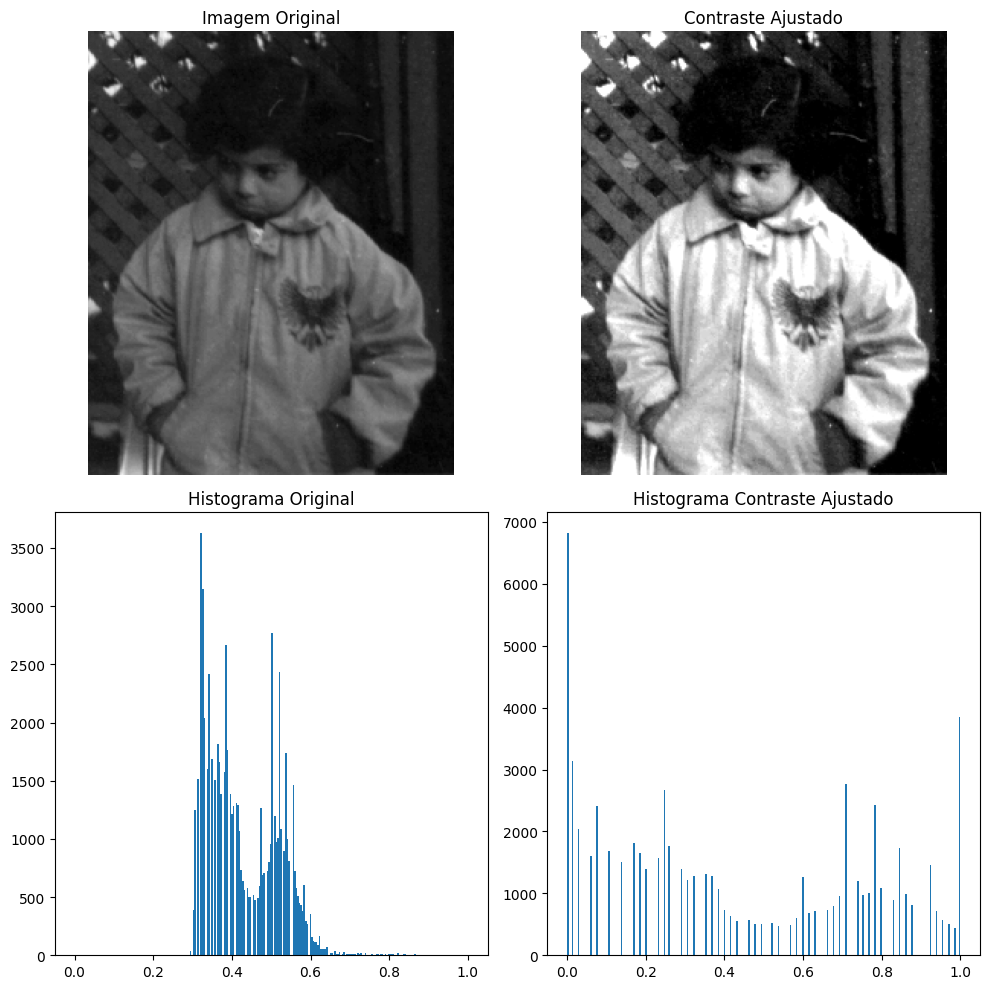

In [4]:
# Contrast stretching

import matplotlib.pyplot as plt
import numpy as np
from skimage import io, img_as_float
from skimage.exposure import rescale_intensity

# Ler a imagem
I = io.imread('pout.tif')

# Converter a imagem para float para evitar erros de tipo
I = img_as_float(I)

# Calcular os limites de stretch usando percentis (equivalente ao stretchlim do Matlab)
p_low, p_high = np.percentile(I, (5, 95))

# Aplicar o ajuste de contraste (rescale_intensity é mais robusto e geral)
Ics = rescale_intensity(I, in_range=(p_low, p_high))

# ou, para uma equivalência mais direta (mas menos robusta em alguns casos):
# from skimage import exposure
# Ics = exposure.adjust_contrast(I, gain=(p_high - p_low)) #não funciona exatamente igual ao stretchlim.

# Criar a figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2 linhas, 2 colunas

# Mostrar as imagens
axes[0, 0].imshow(I, cmap='gray')
axes[0, 0].set_title('Imagem Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(Ics, cmap='gray')
axes[0, 1].set_title('Contraste Ajustado')
axes[0, 1].axis('off')

# Mostrar os histogramas
axes[1, 0].hist(I.ravel(), bins=256, range=(0, 1))  # Histograma da imagem original
axes[1, 0].set_title('Histograma Original')

axes[1, 1].hist(Ics.ravel(), bins=256, range=(0, 1)) # Histograma da imagem com contraste ajustado
axes[1, 1].set_title('Histograma Contraste Ajustado')


# Ajustar layout e mostrar o plot
plt.tight_layout()
plt.show()

O que está acontecendo?

1. A imagem 'pout.tif' é lida.
2. Os limites de intensidade de pixel são calculados usando os percentis 5% e 95%.
3. O contraste da imagem é esticado, mapeando os valores entre os percentis calculados para a faixa completa de intensidades (0 a 1, pois convertemos para float).
4. As imagens original e com contraste ajustado são exibidas lado a lado."